In [99]:
#import packages
from __future__ import division #Ensure division returns float
import pandas as pd
import numpy as np
from math import sqrt
from numpy.random import seed, randn
from numpy import mean
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std # version >= 1.7.1 && <= 1.9.1
from math import sqrt
import sys
from statistics import mean, stdev
from math import sqrt
from numpy import mean
from scipy.stats import t, pearsonr
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr
from matplotlib import pyplot



In [100]:
#import excel file containing data summary
wtpdata = pd.read_excel(r'wtp_task_summary.xlsx')
print(wtpdata)


                  participant  avg_spent_social  avg_spent_nonsocial  \
0    5ea3310bf9c4f828f0c909c5          0.030244             0.029000   
1    5eeaff28cf5da71d691ef212          0.026000             0.028780   
2    5ee1bc2e2be5f61f0eaf1713          0.027308             0.028000   
3   ﻿5cfecc1e96681500168a1799          0.038333             0.037037   
4    5ff362e8c9707d8ff6020080          0.028800             0.026800   
5   ﻿5e76742575ad9c0506e721bb          0.031667             0.029091   
6    ﻿5ef76ff7d195c248bfe2511          0.031795             0.030833   
7   ﻿5f7e4fbc36d39211c80599fe          0.035263             0.027813   
8   ﻿5f8dd51f6d2378145bf99cdc          0.035000             0.029063   
9   ﻿5f12b3a2791d172281e7d6a9          0.028621             0.024545   
10  ﻿5f974745d58f7f0fca155a48          0.029615             0.027200   
11  ﻿5ff0a56b116bbf440e520992          0.037692             0.029600   
12  ﻿566c9284d408ea000519c6d7          0.018889             0.01

In [101]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print(social_M)

0.03231427780595933


In [102]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences

nonsocial_M = mean(nonsocialavg)
print(nonsocial_M)


0.029843302241504492


In [103]:
#sample size
n = len(wtpdata)
print(n)

18


In [104]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.00025275315626193713 0.044477560160187196
0.0028987846534422003


In [105]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0006832500952161587


In [106]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

3.6165023345852574


In [107]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

17


In [108]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=3.617, df=17, cv=1.740, p=0.002
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


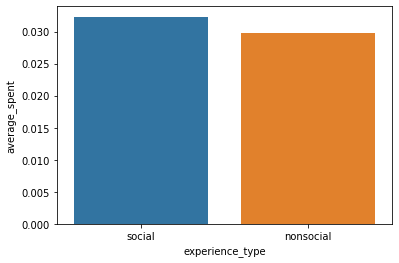

In [109]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})
#print(wtp_means)
ax = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [111]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.44170957319949283


In [114]:
alldata = pd.read_excel (r'WTP_all_scores.xlsx')
print(alldata)


                  participant  avg_spent_social  avg_spent_nonsocial  \
0    5ea3310bf9c4f828f0c909c5          0.030244             0.029000   
1    5eeaff28cf5da71d691ef212          0.026000             0.028780   
2    5ee1bc2e2be5f61f0eaf1713          0.027308             0.028000   
3   ﻿5cfecc1e96681500168a1799          0.038333             0.037037   
4    5ff362e8c9707d8ff6020080          0.028800             0.026800   
5   ﻿5e76742575ad9c0506e721bb          0.031667             0.029091   
6    ﻿5ef76ff7d195c248bfe2511          0.031795             0.030833   
7   ﻿5f7e4fbc36d39211c80599fe          0.035263             0.027813   
8   ﻿5f8dd51f6d2378145bf99cdc          0.035000             0.029063   
9   ﻿5f12b3a2791d172281e7d6a9          0.028621             0.024545   
10  ﻿5f974745d58f7f0fca155a48          0.029615             0.027200   
11  ﻿5ff0a56b116bbf440e520992          0.037692             0.029600   
12  ﻿566c9284d408ea000519c6d7          0.018889             0.01

In [116]:
spent_soc = alldata['avg_spent_social']
spent_nonsoc = alldata['avg_spent_nonsocial']
randsoc_support = alldata['socsupport_score']
loneliness = alldata['loneliness_score']
solitude = alldata['msssf_score']
per_soc_support= alldata['mspss_score']
prop_social = alldata['%_social']

In [117]:
print(mean(spent_soc))

print(mean(randsoc_support)) #rand soc support asks about social support in the past month

print(mean(per_soc_support)) # mspss asks about social support in general

print(mean(loneliness))

print(mean(solitude))

0.03231427780595933
47.27777777777778
62.388888888888886
48.77777777777778
38.72222222222222


In [118]:
# amount spent on social experiences // self report 

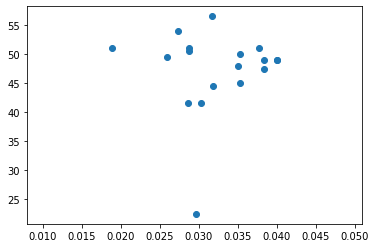

[[3.18599030e-05 2.05997747e-03]
 [2.05997747e-03 5.28006536e+01]]
Pearsons correlation: 0.050


In [119]:
#amount spent on social / rand social support

pyplot.scatter(spent_soc, randsoc_support) 
pyplot.show()
covariance = cov(spent_soc, randsoc_support)
print(covariance)
corr, _ = pearsonr(spent_soc, randsoc_support)
print('Pearsons correlation: %.3f' % corr)

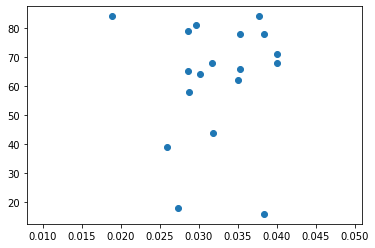

[[3.18599030e-05 4.46430620e-03]
 [4.46430620e-03 4.25310458e+02]]
Pearsons correlation: 0.038


In [120]:
#amount spent on social / MSPSS
pyplot.scatter(spent_soc, per_soc_support)
pyplot.show()
covariance = cov(spent_soc, per_soc_support)
print(covariance)
corr, _ = pearsonr(spent_soc, per_soc_support)
print('Pearsons correlation: %.3f' % corr)

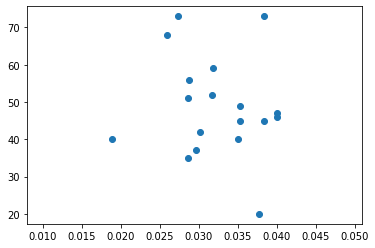

[[ 3.18599030e-05 -1.00914289e-02]
 [-1.00914289e-02  1.83006536e+02]]
Pearsons correlation: -0.132


In [121]:
#amount spent on social / loneliness scale
pyplot.scatter(spent_soc, loneliness) 
pyplot.show()
covariance = cov(spent_soc, loneliness)
print(covariance)
corr, _ = pearsonr(spent_soc, loneliness)
print('Pearsons correlation: %.3f' % corr)

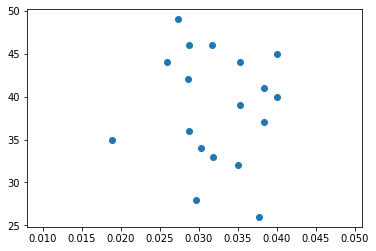

[[ 3.18599030e-05 -2.00625865e-03]
 [-2.00625865e-03  4.26830065e+01]]


In [122]:
#amount spent on social / motivation for solitude
pyplot.scatter(spent_soc, solitude) 
pyplot.show()
covariance = cov(spent_soc, solitude)
print(covariance)
corr, _ = pearsonr(spent_soc, solitude)
#print('Pearsons correlation: %.3f' % corr)

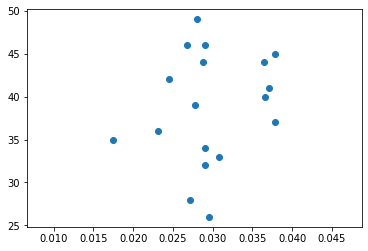

[[3.07284140e-05 7.37412444e-03]
 [7.37412444e-03 4.26830065e+01]]
Pearsons correlation: 0.204


In [123]:
#amount spent on NONsocial / motivation for solitude
pyplot.scatter(spent_nonsoc, solitude) 
pyplot.show()
covariance = cov(spent_nonsoc, solitude)
print(covariance)
corr, _ = pearsonr(spent_nonsoc, solitude)
print('Pearsons correlation: %.3f' % corr)

In [124]:
# prop of chosen social // self report




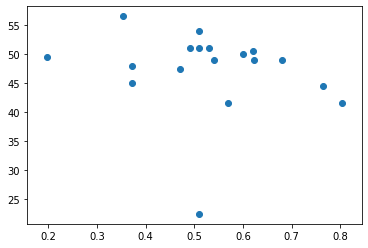

[[3.18599030e-05 2.05997747e-03]
 [2.05997747e-03 5.28006536e+01]]
Pearsons correlation: 0.050


In [125]:
#prop of chosen social // rand social support
pyplot.scatter(prop_social, randsoc_support) 
pyplot.show()
covariance = cov(spent_soc, randsoc_support)
print(covariance)
corr, _ = pearsonr(spent_soc, randsoc_support)
print('Pearsons correlation: %.3f' % corr)

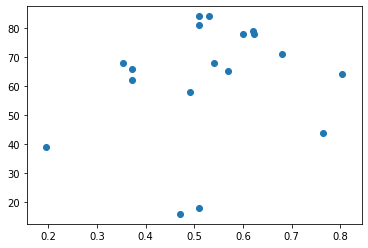

[[2.20294516e-02 6.42221259e-01]
 [6.42221259e-01 4.25310458e+02]]
Pearsons correlation: 0.210


In [126]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, per_soc_support)
pyplot.show()
covariance = cov(prop_social, per_soc_support)
print(covariance)
corr, _ = pearsonr(prop_social, per_soc_support)
print('Pearsons correlation: %.3f' % corr)

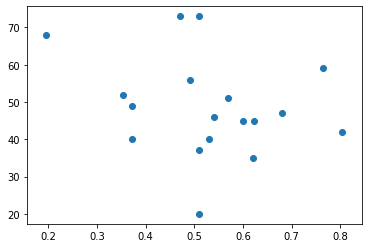

[[ 2.20294516e-02 -5.03023706e-01]
 [-5.03023706e-01  1.83006536e+02]]
Pearsons correlation: -0.251


In [127]:
#prop of chosen social // loneliness scale
pyplot.scatter(prop_social, loneliness) 
pyplot.show()
covariance = cov(prop_social, loneliness)
print(covariance)
corr, _ = pearsonr(prop_social, loneliness)
print('Pearsons correlation: %.3f' % corr)

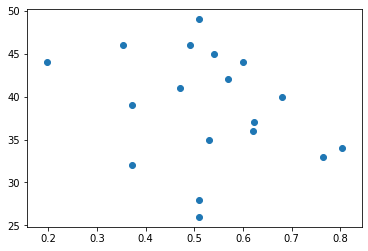

[[ 2.20294516e-02 -2.63593781e-01]
 [-2.63593781e-01  4.26830065e+01]]
Pearsons correlation: -0.272


In [128]:
#prop of chosen social // motivation for solitude
pyplot.scatter(prop_social, solitude) 
pyplot.show()
covariance = cov(prop_social, solitude)
print(covariance)
corr, _ = pearsonr(prop_social, solitude)
print('Pearsons correlation: %.3f' % corr)